In [19]:
import pandas as pd
import numpy as np
import datetime
import csv
import math
import matplotlib.pyplot as plt
# data source: http://www.unb.ca/cic/research/datasets/botnet.html
# to process pcap file, e.g. "ISCX_Botnet-Training.pcap" in tshark, 
# install Wireshark and call tshark from command line
# tshark -nr ISCX_Botnet-Training.pcap -T fields -E header=y -e frame.time_relative -e frame.len -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -e udp.srcport -e udp.dstport  > iscxTrainPCAP.txt
# because of irregularity in frame.time_relative after line 1201967
# head -n 1201967 iscxTrainPCAP.txt > train.txt

In [4]:
#Reads processed file
filename = 'train-Copy1.txt'

a = datetime.datetime.now().replace(microsecond=0)
df1 = pd.read_table(filename)
df1 = df1.dropna(axis = 0, subset= ['ip.src'])
df1 = df1.reset_index(drop=True)

#this file had unreliable frame_time_relative after line 1201967
#data = pd.read_table("iscxTrainPCAP.txt")
#data = data.dropna(axis = 0, subset= ['ip.src'])
#data = data.reset_index(drop=True)
#data.tail(5)
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:00:02


In [5]:
# scans malicious IP address list from http://www.unb.ca/cic/research/datasets/botnet.html stored in BotIPs.txt
#gives each flow 'bot' attribute (True or False)
badIPs = 'BotIPs copy.txt'

a = datetime.datetime.now().replace(microsecond=0)
botIPs = []
with open(badIPs, 'r') as f:
    reader = csv.reader(f, delimiter = '\t')
    for ip in reader:
        botIPs.append(ip)

botIPs = [val for sublist in botIPs for val in sublist]
for i in botIPs:
    if (len(i) == 0):
        botIPs.remove(i)
        
df1['bot'] = df1['ip.src'].map(lambda x: True if x in botIPs else False)
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:00:01


In [6]:
df = df1[:5000]
#should be (1187635, 9)
df1.shape
#should be (5000, 9)
df.shape

(5000, 9)

In [7]:
df

,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,bot
0,162.765245,110,147.32.84.180,147.32.84.255,NaN,NaN,137.0,137.0,True
1,162.765253,110,147.32.84.180,147.32.84.255,NaN,NaN,137.0,137.0,True
2,163.510681,110,147.32.84.180,147.32.84.255,NaN,NaN,137.0,137.0,True
3,163.510692,110,147.32.84.180,147.32.84.255,NaN,NaN,137.0,137.0,True
4,163.929961,64,147.32.84.180,147.32.80.9,NaN,NaN,1025.0,53.0,True
5,163.929967,64,147.32.84.180,147.32.80.9,NaN,NaN,1025.0,53.0,True
6,163.930586,139,147.32.80.9,147.32.84.180,NaN,NaN,53.0,1025.0,False
7,163.930994,92,147.32.84.180,147.32.84.255,NaN,NaN,137.0,137.0,True
8,163.930999,92,147.32.84.180,147.32.84.255,NaN,NaN,137.0,137.0,True
9,164.262142,110,147.32.84.180,147.32.84.255,NaN,NaN,137.0,137.0,True


In [8]:
##starts separating by sourceIPs
a = datetime.datetime.now().replace(microsecond=0)
SourceIPs = list(set(df['ip.src']))
print(len(SourceIPs))
#counter = 0
sourceIPs = {}
for s in SourceIPs:
    sourceIPs[s] = []
    #counter += 1
    #print(counter)
print("filling dict") 
for i in range(df.shape[0]):
    #print("i = {}".format(i))
    for s in sourceIPs:
        if df.iloc[i]['ip.src'] == s:
            sourceIPs[s].append(df.iloc[i])
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

55
filling dict
0:00:42


In [9]:
##then filters by destIPs
a = datetime.datetime.now().replace(microsecond=0)
DestIPs = list(set(df['ip.dst'][~pd.isnull(df['ip.dst'])]))
print(len(DestIPs))
destIPs = {}
#counter = 0
for d in DestIPs:
    destIPs[d] = []
    #counter += 1
    #print(counter)

print("filling dict")    
for key, value in sourceIPs.items():
    for d in DestIPs:
        for i in range(len(value)):
            #print("i = {}".format(i))
            if value[i]['ip.dst'] == d:
                destIPs[d].append(value[i])
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

141
filling dict
0:00:08


In [10]:
#sorts into TCP C-flows
a = datetime.datetime.now().replace(microsecond=0)
TCPSrcs = list(set(df['tcp.srcport'][~pd.isnull(df['tcp.srcport'])]))
TCPsrcs = {}
for t in TCPSrcs:
    TCPsrcs[t] = []
for key, value in destIPs.items():
    for t in TCPSrcs:
        for i in range(len(value)):
            if value[i]['tcp.srcport'] == t:
                TCPsrcs[t].append(value[i])

TCPDsts = list(set(df['tcp.dstport'][~pd.isnull(df['tcp.dstport'])]))
#len(TCPDsts)
TCPdsts = {}
for t in TCPDsts:
    TCPdsts[t] = []    
for key, value in TCPsrcs.items():
    for t in TCPDsts:
        for i in range(len(value)):
            if value[i]['tcp.dstport'] == t:
                TCPdsts[t].append(value[i])
            
for k in list(TCPdsts.keys()):
    if len(TCPdsts[k]) == 0:
        del TCPdsts[k]

len(TCPdsts)
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:00:21


In [11]:
#sorts into UDP C-flows
a = datetime.datetime.now().replace(microsecond=0)
UDPSrcs = list(set(df['udp.srcport'][~pd.isnull(df['udp.srcport'])]))
UDPsrcs = {}
for u in UDPSrcs:
    UDPsrcs[u] = []
for key, value in destIPs.items():
    for u in UDPSrcs:
        for i in range(len(value)):
            if value[i]['udp.srcport'] == u:
                UDPsrcs[u].append(value[i])

UDPDsts = list(set(df['udp.dstport'][~pd.isnull(df['udp.dstport'])]))
UDPdsts = {}
for u in UDPDsts:
    UDPdsts[u] = []    
for key, value in UDPsrcs.items():
    for u in UDPDsts:
        for i in range(len(value)):
            if value[i]['udp.dstport'] == u:
                if not pd.isnull(value[i]['udp.dstport']):
                    UDPdsts[u].append(value[i])  
                    
for k in list(UDPdsts.keys()):
    if len(UDPdsts[k]) == 0:
        del UDPdsts[k]
len(UDPdsts)
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:00:00


In [14]:
# summarizes C-flow in 5-element vector: bot (0/1), bpp (bits/packet), bps (bits/s), 
# pps (packets/s), ppf (packets/flow)
def CflowVectorizer(flow):
    ppf = len(flow)
    if ppf > 0:
        cFlow = []
        totalBytes = 0
        try:
            startTime = flow[0]['frame.time_relative']
            endTime = flow[ppf-1]['frame.time_relative']
            IP = flow[0]['ip.src']
            for j in range(ppf):
                if flow[j]['bot'] == True:
                    bot = 1
                else:
                    bot = 0
                if flow[j]['frame.time_relative'] < startTime:
                    startTime = flow[j]['frame.time_relative']
                if flow[j]['frame.time_relative'] > endTime:
                    endTime = flow[j]['frame.time_relative']
                totalBytes += flow[j]['frame.len']
            duration = endTime-startTime
            bpp = totalBytes/ppf
            if duration > 0:
                pps = ppf/duration
                bps = totalBytes/duration
            else:
                pps = 0
                bps = 0
        except IndexError:
            pass
        cFlow.append(bot)
        cFlow.append(bpp)
        cFlow.append(bps)
        cFlow.append(pps)
        cFlow.append(ppf)
        cFlow.append(IP)
            
    return cFlow

In [15]:
# vectorizes C-flows 
a = datetime.datetime.now().replace(microsecond=0)
TCPflows = list(TCPdsts.values())
UDPflows = list(UDPdsts.values())
allFlows = TCPflows + UDPflows
CFLOWS = []
for f in allFlows:
    CFLOWS.append(CflowVectorizer(f))
CFlowDF = pd.DataFrame(CFLOWS, columns = ['bot', 'bpp' ,'bps', 'pps', 'ppf', 'IP'])
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:00:01


In [31]:
# inspect CflowDF
CFlowDF.head(5)

,bot,bpp,bps,pps,ppf,IP
0,1,60.000000,2.447582e+00,0.040793,4,147.32.84.180
1,1,60.000000,2.423529e+00,0.040392,4,147.32.84.180
2,1,60.000000,1.714286e+07,285714.286436,2,147.32.84.180
3,0,84.333333,7.387077e+03,87.593798,3,74.125.232.195
4,1,60.000000,1.333333e+07,222222.222783,2,147.32.84.180


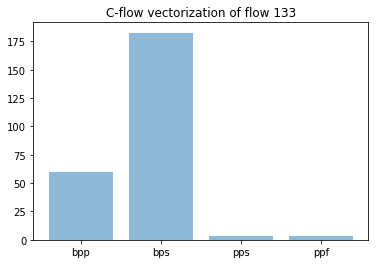

In [20]:
objects = list(CFlowDF)[1:5]
y_pos = np.arange(len(objects))
#example of non-smooth flow
idx = 133
#idx = random.randint(CFlowDF.shape[0])
row = CFlowDF.ix[idx]
performance = [row.bpp, row.bps, row.pps, row.ppf]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('C-flow vectorization of flow {}'.format(idx))

plt.show()

In [21]:
def bins(flows):
    quantiles = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
    kBin = []
    for q in quantiles:
        kBin.append(np.percentile(flows, q))
    return kBin

In [22]:
# k-bins : 13 (binning C-flows so all elements are range 0-12)
a = datetime.datetime.now().replace(microsecond=0)
bppBin = bins(CFlowDF['bpp'])
bpsBin = bins(CFlowDF['bps'])
ppsBin = bins(CFlowDF['pps'])
ppfBin = bins(CFlowDF['ppf'])
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:00:00


In [32]:
# inspects bin values
bppBin
#bpsBin
#ppsBin
#ppfBin

[60.0,
 60.0,
 60.004687500000003,
 60.666666666666664,
 60.666666666666664,
 63.084350282485879,
 75.896653071793878,
 97.700000000000003,
 111.44000000000001,
 182.76210526315785,
 556.40000000000032,
 1585.9715846994538,
 2400.3636363636365]

In [23]:
# normalizes C-flows so all elements are in range 0-12
a = datetime.datetime.now().replace(microsecond=0)
# 13 bins
nBins = len(bppBin)  
cFlowDF = CFlowDF.copy()
for i in range(cFlowDF.shape[0]): 
    flow = cFlowDF.ix[i]
    for k in range(1,nBins):
        if flow['bpp'] <= bppBin[k] and flow['bpp'] > bppBin[k-1]:
            cFlowDF.set_value(i,'bpp', k-1) 
        if flow['bps'] <= bpsBin[k] and flow['bps'] > bpsBin[k-1]:
            cFlowDF.set_value(i,'bps', k-1)
        if flow['pps'] <= ppsBin[k] and flow['bpp'] > ppsBin[k-1]:
            cFlowDF.set_value(i,'pps', k-1)
        if flow['ppf'] <= ppfBin[k] and flow['ppf'] > ppfBin[k-1]:
            cFlowDF.set_value(i,'ppf', k-1)
    if flow['bpp'] > 11:
        cFlowDF.set_value(i,'bpp', 12)
    if flow['bps'] > 11:
        cFlowDF.set_value(i,'bps', 12)
    if flow['pps'] > 11:
        cFlowDF.set_value(i,'pps', 12)
    if flow['ppf'] > 11:
        cFlowDF.set_value(i,'ppf', 12)
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:00:00


In [33]:
# inspects cFlowDF
cFlowDF.head(5)

,bot,bpp,bps,pps,ppf,IP,predicted_cluster
0,1,12.0,2.447582,11.0,5,147.32.84.180,2
1,1,12.0,2.423529,11.0,5,147.32.84.180,2
2,1,12.0,12.000000,12.0,2,147.32.84.180,0
3,0,12.0,12.000000,12.0,0,74.125.232.195,5
4,1,12.0,12.000000,12.0,2,147.32.84.180,0


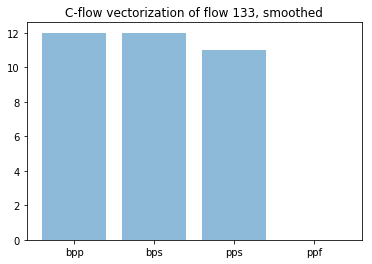

In [24]:
objects = list(CFlowDF)[1:5]
y_pos = np.arange(len(objects))
row = cFlowDF.ix[idx]
performance = [row.bpp, row.bps, row.pps, row.ppf]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('C-flow vectorization of flow {}, smoothed'.format(idx))

plt.show()

In [25]:
def calculateEntropy(cluster):
    numBots = sum(cluster['bot'])
    total = float(cluster.shape[0])
    pBot = numBots / total
    pNot = (total-numBots) / total
    try:
        entropy = -pBot * math.log2(pBot) - pNot * math.log2(pNot)
    except ValueError:
        entropy = 0
    entropy = entropy * (total / cFlowDF.shape[0])
    return entropy

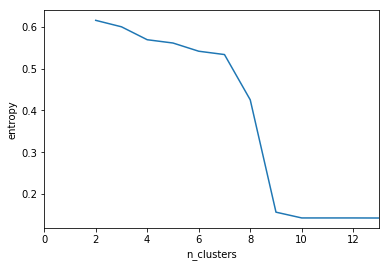

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#kMeans = [x for x in range(5)]
kMeans = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
X = cFlowDF.iloc[:,:5]

clusts = {}
for k in kMeans:
    clusts[k] = 0
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    cFlowDF['predicted_cluster'] = kmeans.fit_predict(X)
    E = 0
    for i in range(k):
        c = cFlowDF.where(cFlowDF['predicted_cluster'] == i).dropna()
        E += calculateEntropy(c)
    clusts[k] = E
    
plt.plot(kMeans, list(clusts.values()))
plt.xlim(0, max(kMeans)) 
plt.xlabel('n_clusters')
plt.ylabel('entropy')
plt.show()

In [27]:
# choose best k by local min of entropy (X-means with information criterion)
import operator
sorted_clusts = sorted(clusts.items(), key=operator.itemgetter(1))
sorted_clusts

[(13, 0.14321752272006341),
 (10, 0.14337351992482178),
 (12, 0.14337351992482178),
 (11, 0.14337351992482181),
 (9, 0.15716976303270297),
 (8, 0.42548718302940791),
 (7, 0.53357419483669066),
 (6, 0.54152985003200971),
 (5, 0.56113101105058694),
 (4, 0.56898065790054253),
 (3, 0.59985788326004097),
 (2, 0.61528536152587643)]

In [28]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
cFlowDF['predicted_cluster'] = kmeans.fit_predict(X)

In [29]:
clusters = []
for i in range (k):
    c = cFlowDF.where(cFlowDF['predicted_cluster'] == i).dropna()
    clusters.append(c)
    
for i in range(len(clusters)):
    cluster = clusters[i]
    IP = set(cluster.where(cluster['bot'] == 1).dropna()['IP'])
    if sum(cluster['bot']) > (cluster.shape[0]-3)/float(2):
        prob = sum(cluster['bot']) / cluster.shape[0]
        print('cluster {}: '.format(i) + 'botnet probability: {}'.format(prob))
        print('suspect IP address: {}'.format(IP))

cluster 0: botnet probability: 0.8
suspect IP address: {'147.32.84.180'}
cluster 3: botnet probability: 0.5555555555555556
suspect IP address: {'147.32.84.171', '147.32.84.180'}
cluster 8: botnet probability: 1.0
suspect IP address: {'147.32.84.171', '147.32.84.180'}
